## section 1

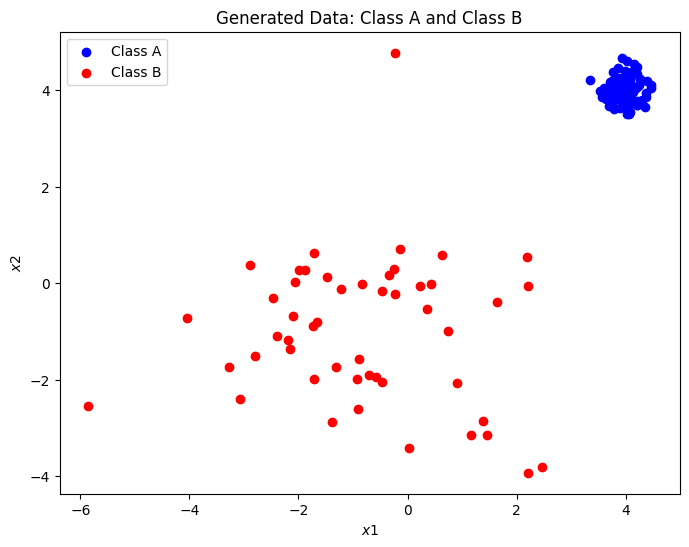

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Generating 2 data class 
np.random.seed(42)
# interms of class A
class_A = np.random.normal(loc=(4,4),scale= 0.25, size= (100,2))# class A points = 100 fetures= 2 ++ loc = means of class ++ scale = bias 
labels_A = np.ones(class_A.shape[0])# label class = 1
# interms of class B
class_B = np.random.normal(loc=(-1,-1),scale=1.5,size=(50, 2))# class B points = 50 fetures= 2 ++ loc = means of class ++ scale = bias 
labels_B = np.zeros(class_B.shape[0])# label class = 0
# make dataset
X = np.vstack((class_A,class_B)) # make X with attaching vertically classA and classB respectively
y = np.hstack((labels_A,labels_B))# make y with attaching horizantally  classA and classB respectively

plt.figure(figsize=(8,6))
plt.scatter(class_A[:, 0], class_A[:, 1], label = 'Class A', color ='b' )
plt.scatter(class_B[:, 0], class_B[:, 1], label = 'Class B', color ='r')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.legend()
plt.show()


As you can see, the data points are linearly separable in many ways. Now let's fit a line to them:

Model weights: w1 = 0.08,w2 = 0.11,bias = 0.22


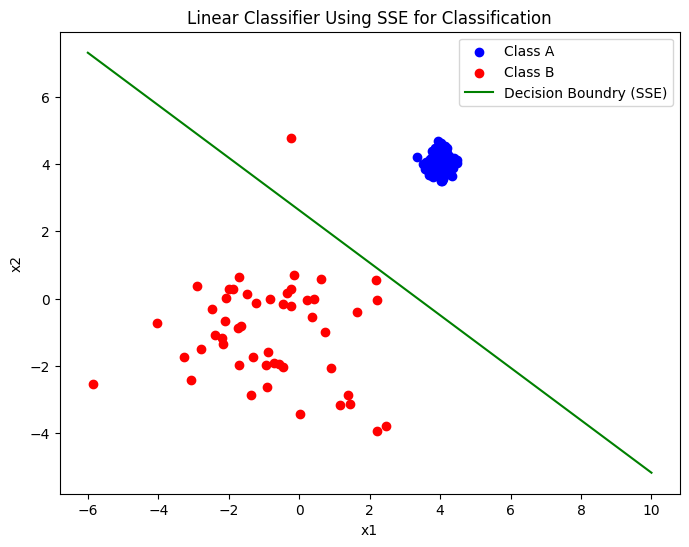

In [2]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X, y)


w1, w2 = model.coef_ # weights
w0 = model.intercept_ # bias 

print(f"Model weights: w1 = {w1:.2f},w2 = {w2:.2f},bias = {w0:.2f}")

# Plot the decision boundary: w1 * x1 + w2 * x2 + b =0.5
x_vals = np.linspace(-6, 10, 100)
decision_boundary = (-w1 * x_vals - w0 + 0.5)/ w2 # (-w1 * x1 - b + 0.5)/w2 = x2

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:,0], class_A[:,1], label = 'Class A', color ='b')
plt.scatter(class_B[:,0], class_B[:,1], label = 'Class B', color = 'r')
plt.plot(x_vals, decision_boundary, label = "Decision Boundry (SSE)", color = 'g')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


make a function to gnerate two class

In [3]:
def generate_ab_class(n_points= 100):
    class_A = []
    class_B = []
    while len (class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0,10)
        y = np.random.uniform(0,10)
        if y > x and len(class_A) < n_points:
            class_A.append([x,y])
        elif y < x and len(class_B) < n_points:
            class_B.append([x,y])
    return np.array(class_A), np.array(class_B)

class_A, class_B = generate_ab_class()

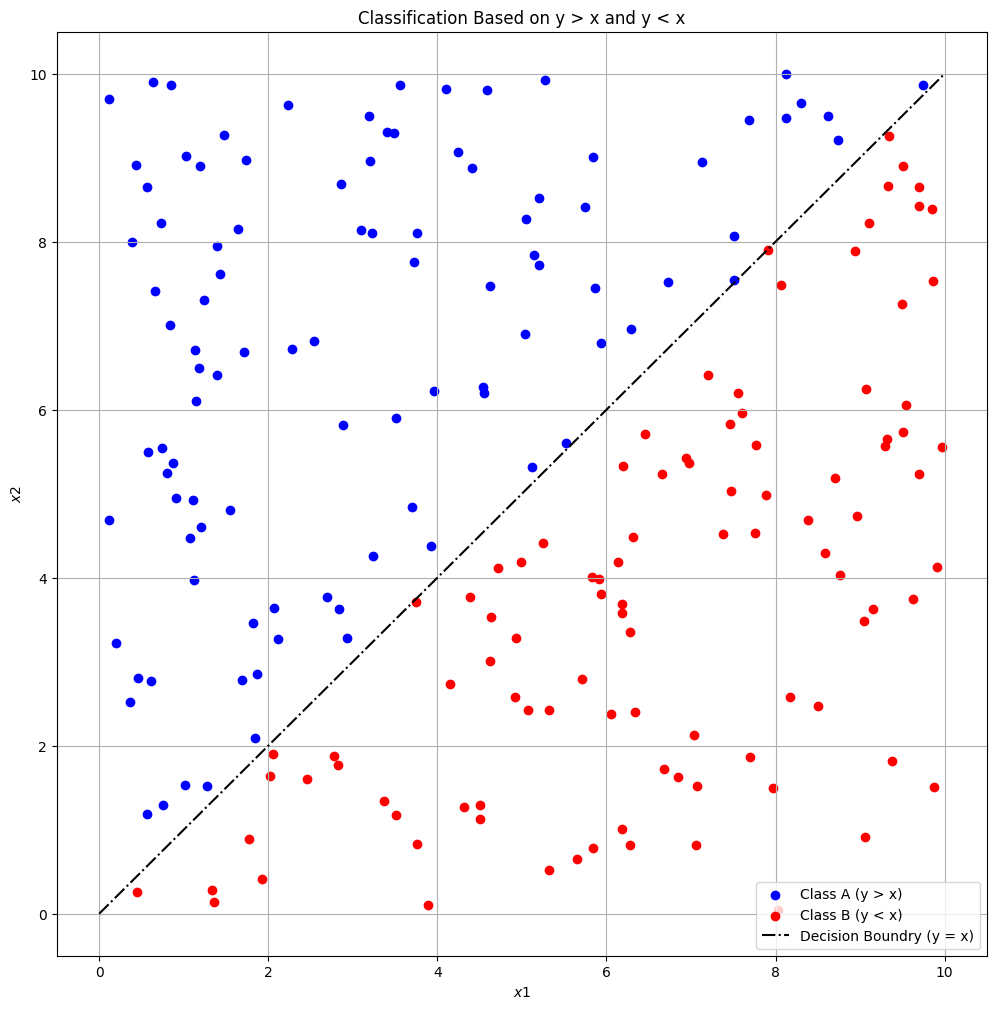

In [4]:
plt.figure(figsize=(12,12))
plt.scatter(class_A[:,0], class_A[:,1], label = 'Class A (y > x)', color = 'b')
plt.scatter(class_B[:,0],class_B[:,1], label = 'Class B (y < x)', color = 'r')
plt.plot([0,10],[0,10],color = 'black',linestyle = '-.', label='Decision Boundry (y = x)')
plt.title("Classification Based on y > x and y < x")
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def generate_xor_data(n_points = 200, seed = 42):
    np.random.seed(seed)
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        if (x > 0.5 and y > 0.5) or (x < 0.5 and y < 0.5):
            if len(class_A) < n_points:
                class_A.append([x,y])
        else:
            if len(class_B) < n_points:
                class_B.append([x,y])
    return np.array(class_A), np.array(class_B)

class_A_xor , class_B_xor = generate_xor_data()

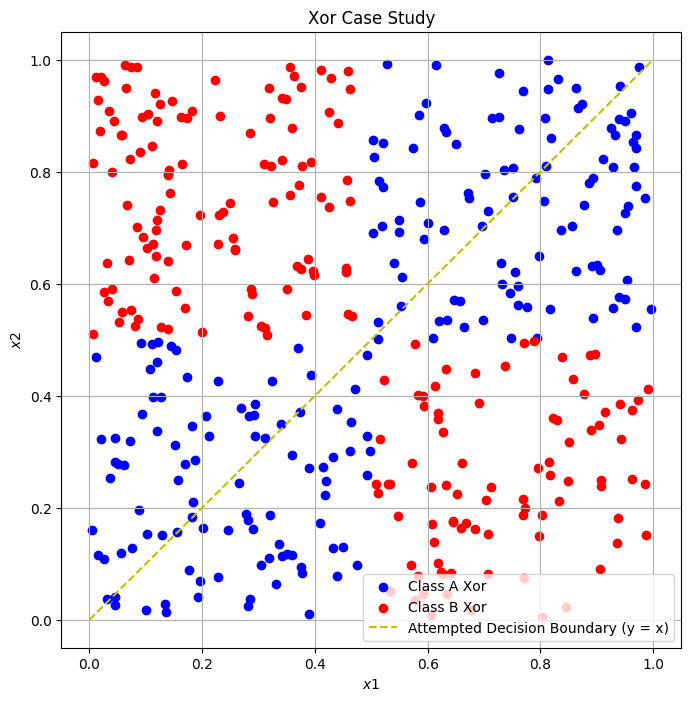

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(class_A_xor[:,0],class_A_xor[:,1], label = 'Class A Xor', color = 'b')
plt.scatter(class_B_xor[:,0],class_B_xor[:,1], label = 'Class B Xor', color = 'r')
plt.plot([0,1],[0,1],color = 'y' ,linestyle='--' ,label='Attempted Decision Boundary (y = x)')
plt.title('Xor Case Study')
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.legend()
plt.grid(True)

In [8]:
def generate_data(n_points = 200, seed = 42):
    np.random.seed(42)
    # class 0: points inside a circle with radius 5 
    radius_0 = 5
    theta_0 = np.random.uniform(0, 2 * np.pi,n_points)
    r_0 = radius_0 * np.sqrt(np.random.uniform(0,1,n_points))
    x0 = r_0*np.cos(theta_0)
    y0 = r_0*np.sin(theta_0)
    class_0 = np.vstack((x0,y0)).T

    # class 1:point in an annulus between radius 8 and 10
    inner_radius_1 = 8
    outer_radius_1 = 10
    theta_1 =np.random.uniform(0,2*np.pi,n_points)
    r_1 = np.sqrt(np.random.uniform(inner_radius_1**2,outer_radius_1**2,n_points))
    x1 = r_1*np.cos(theta_1)
    y1 = r_1*np.sin(theta_1)
    class_1 = np.vstack((x1,y1)).T

    return class_0, class_1

class_0 , class_1 = generate_data()


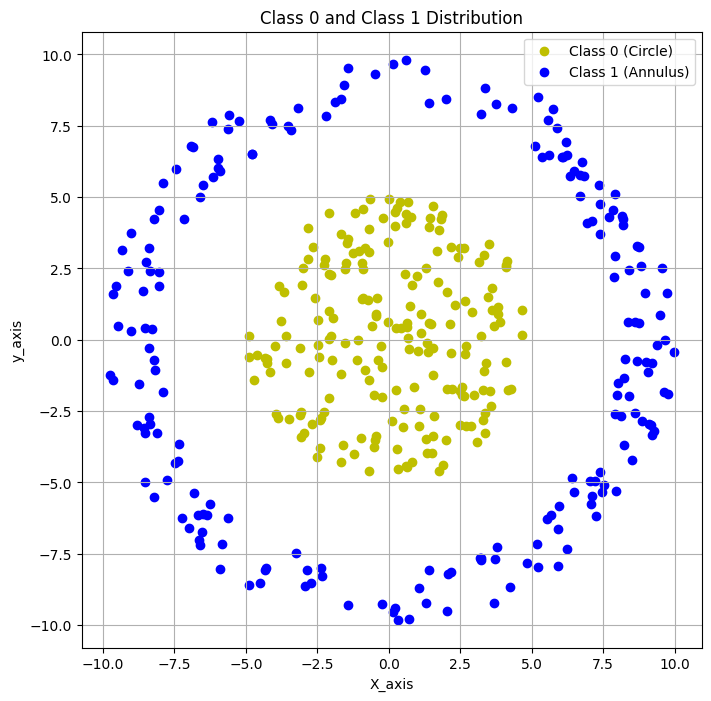

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(class_0[:,0],class_0[:,1],color = "y", label = 'Class 0 (Circle)')
plt.scatter(class_1[:,0],class_1[:,1],color = "b",label = "Class 1 (Annulus)")
plt.xlabel("X_axis")
plt.ylabel("y_axis")
plt.title("Class 0 and Class 1 Distribution")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer
X = data.data
y = data.target
